Data Collection & Image Processing

# Collecting images of different food items organized into subdirectories based on their respective **names**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
ls

drive/  sample_data/


In [6]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [7]:
pwd

'/content/drive/MyDrive'

In [ ]:
!unzip /content/drive/MyDrive/TRAIN_SET

In [17]:
!unzip /content/drive/MyDrive/TEST_SET

# Importing and configuring the Image data generator library from **Keras**

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [20]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [21]:
test_datagen=ImageDataGenerator(rescale=1./255)

# Applying Image data generator functionality to training set and testing **set**

In [22]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/TRAIN_SET",target_size=(64,64),color_mode='rgb',class_mode="categorical",batch_size=24)


Found 5252 images belonging to 6 classes.


In [23]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/TEST_SET",target_size=(64,64),color_mode='rgb',class_mode="categorical",batch_size=24)


Found 1095 images belonging to 6 classes.


In [24]:
x_train.class_indices

{'APPLES': 0,
 'BANANA': 1,
 'ORANGE': 2,
 'PINEAPPLE': 3,
 'TRAIN_SET': 4,
 'WATERMELON': 5}

# Model Building & **Testing**

In [25]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

# Initializing the **model**

In [26]:
model=Sequential()

# Creating the **model**

In [27]:
model.add(Conv2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [31]:
model.add(Dense(5,activation="softmax"))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                        

In [33]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))

In [34]:
model.add(Dense(4,activation='softmax'))

In [35]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(x_train,epochs=10,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

# Saving the **Model**

In [41]:
model.save('train.h5')

In [42]:
model.save('dataset.h5')

In [43]:
model.save('fruits.h5')

In [44]:
model.save('nutrition.h5')

# Testing the **Model**

In [45]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [46]:
model=load_model('train.h5')

In [47]:
model=load_model('dataset.h5')

In [48]:
model=load_model('fruits.h5')

In [49]:
model=load_model('nutrition.h5')

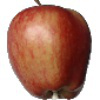

In [50]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/APPLES/32_100.jpg")
img

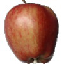

In [51]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/APPLES/32_100.jpg",target_size=(64,64))
img

In [52]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [53]:
x=np.expand_dims(x,axis=0)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [54]:
pred = model.predict
pred

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f6b06d4b750>>

In [59]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=0)

46/46 [==============================] - 4s 79ms/step


In [ ]:
predict_x

In [ ]:
classes_x

In [ ]:
x_test.class_indices

In [48]:
index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']

In [49]:
index[np.argmax(pred)]

'APPLES'

# Build Python **Code**

In [62]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

# Creating our flask application and loading our model by using the load_model **method**

In [64]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


Routing to Html page

In [65]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [66]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [ ]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launch():
    if request.methods=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))
        return render_template("0.html",showcase=(result))

In [ ]:
x=result
print(x)
result=nutrition(result)
print(result)

In [57]:
def nutrition(index):


    url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"
    
    querystring = {"query":index}
    
    headers = {
        'x-rapidapi-key': "5d797ab107mshe668f26bd044e64p1ffd34jsnf47bfa9a8ee4",
        'x-rapidapi-host': "calorieninjas.p.rapidapi.com"
        }
    response = requests.request("GET", url="https://calorieninjas.p.rapidapi.com/v1/nutrition", headers =
                                {
        'x-rapidapi-key': "5d797ab107mshe668f26bd044e64p1ffd34jsnf47bfa9a8ee4",
        'x-rapidapi-host': "calorieninjas.p.rapidapi.com"
        }, params= {"query":index} )
    print(response.text)     
    return response.json()['items']

In [5]:
if __name__ == "__file__":
   # running the app
    app.run(debug=False)